# Observed Trends
1) The max temperature peaks near the equator. When the latitude increases positively (towards North), the max temperature drops. 

2) Humidity and cloudiness do not seem to be correlated to latitude as there is a relatively uniform spread across the different latitude points. 

3) The majority of cities have a windspeed under 20 mph. 

In [1]:
#Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import time
import random
!pip install citipy
from citipy import citipy
#set style for plots
plt.style.use("seaborn")


# Representative Sample

In [2]:
#Creating list of lats/lngs
lats = range(-90, 90)
lngs = range(-180, 180)
city_list = []
for lat in lats:
    for lng in lngs:
        city = citipy.nearest_city(lat, lng)
        city_name = city.city_name
        city_list.append(city_name)
# Do some cleaning (remove duplicates)
city_df = pd.DataFrame(city_list)
new_city_df = city_df.drop_duplicates()

In [3]:
#Extracting sample cities
sampled_cities = new_city_df.sample(700)
sampled_cities = sampled_cities.reset_index(drop = True)
sampled_cities.columns = ["City"]
sampled_cities.index += 1 
sampled_cities["Lat"] = ""
sampled_cities["Lng"] = ""
sampled_cities["Country"] = ""
sampled_cities["Date"] = ""
sampled_cities["Max Temp"] = ""
sampled_cities["Humidity"] = ""
sampled_cities["Cloudiness"] = ""
sampled_cities["Wind Speed"] = ""
sampled_cities.head()

,City,Lat,Lng,Country,Date,Max Temp,Humidity,Cloudiness,Wind Speed
1,zhanakorgan,,,,,,,,
2,lesogorskiy,,,,,,,,
3,ust-barguzin,,,,,,,,
4,chateaubelair,,,,,,,,
5,megion,,,,,,,,


# OpenWeatherMap API Weather Check

In [4]:
filename = 'apikey'
def get_file_contents(filename):
    try:
        with open(filename, 'r') as f:
            return f.read().strip()
    except FileNotFoundError:
        print("'%s' file not found" % filename)
api_key = get_file_contents(filename)

In [5]:
units = "Imperial"
print("Beginning Data Retrieval")
print("-------------------------------")
for index,row in sampled_cities.iterrows():
    city_name = row["City"]
    city_url_name = city_name.replace(" ", "%20")
    target_url = "http://api.openweathermap.org/data/2.5/weather?units=%s&APPID=%s&q=%s" % (units, api_key, city_url_name)
    city_weather = requests.get(target_url).json()
    sampled_cities.set_value(index,"Lat",city_weather.get("coord",{}).get("lat"))
    sampled_cities.set_value(index,"Lng",city_weather.get("coord",{}).get("lon"))
    sampled_cities.set_value(index,"Country",city_weather.get("sys",{}).get("country"))
    sampled_cities.set_value(index,"Date",city_weather.get("dt",{}))
    sampled_cities.set_value(index,"Max Temp",city_weather.get("main",{}).get("temp_max"))
    sampled_cities.set_value(index,"Humidity",city_weather.get("main",{}).get("humidity"))
    sampled_cities.set_value(index,"Cloudiness",city_weather.get("clouds",{}).get("all"))
    sampled_cities.set_value(index,"Wind Speed",city_weather.get("wind",{}).get("speed"))
    print("Processing Record " + str(index) + " of 700 | " + str(city_name))
    print_url = "http://api.openweathermap.org/data/2.5/weather?units=%s&APPID=%s&q=%s" % (units, "api_id", city_url_name)
    print(print_url)
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")


Beginning Data Retrieval
-------------------------------
Processing Record 1 of 700 | zhanakorgan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=zhanakorgan
Processing Record 2 of 700 | lesogorskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=lesogorskiy
Processing Record 3 of 700 | ust-barguzin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=ust-barguzin
Processing Record 4 of 700 | chateaubelair
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=chateaubelair
Processing Record 5 of 700 | megion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=megion
Processing Record 6 of 700 | erhlin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=erhlin
Processing Record 7 of 700 | gardan diwal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=gardan%20diwal
Processing Record 8 of 700 | manzil tamim
h

Processing Record 66 of 700 | cheremkhovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=cheremkhovo
Processing Record 67 of 700 | pontal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=pontal
Processing Record 68 of 700 | salmas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=salmas
Processing Record 69 of 700 | consett
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=consett
Processing Record 70 of 700 | nizhneyansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=nizhneyansk
Processing Record 71 of 700 | turiacu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=turiacu
Processing Record 72 of 700 | chadiza
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=chadiza
Processing Record 73 of 700 | algiers
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=algiers
Proc

Processing Record 132 of 700 | ulkan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=ulkan
Processing Record 133 of 700 | nampula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=nampula
Processing Record 134 of 700 | athni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=athni
Processing Record 135 of 700 | iralaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=iralaya
Processing Record 136 of 700 | perene
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=perene
Processing Record 137 of 700 | cananeia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=cananeia
Processing Record 138 of 700 | aketi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=aketi
Processing Record 139 of 700 | grand centre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=grand%20centre
Processi

Processing Record 197 of 700 | zarubino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=zarubino
Processing Record 198 of 700 | tura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=tura
Processing Record 199 of 700 | santa catarina de tepehuanes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=santa%20catarina%20de%20tepehuanes
Processing Record 200 of 700 | shakiso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=shakiso
Processing Record 201 of 700 | rawah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=rawah
Processing Record 202 of 700 | camrose
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=camrose
Processing Record 203 of 700 | riverton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=riverton
Processing Record 204 of 700 | pedernales
http://api.openweathermap.org/data/2.5/weather?u

Processing Record 261 of 700 | znamenskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=znamenskoye
Processing Record 262 of 700 | terryville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=terryville
Processing Record 263 of 700 | la seyne-sur-mer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=la%20seyne-sur-mer
Processing Record 264 of 700 | machinga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=machinga
Processing Record 265 of 700 | hermiston
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=hermiston
Processing Record 266 of 700 | new norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=new%20norfolk
Processing Record 267 of 700 | manvi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=manvi
Processing Record 268 of 700 | wroclaw
http://api.openweathermap.org/data/2.5/weather?

Processing Record 326 of 700 | dvinskoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=dvinskoy
Processing Record 327 of 700 | pozoblanco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=pozoblanco
Processing Record 328 of 700 | glubokiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=glubokiy
Processing Record 329 of 700 | nakamura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=nakamura
Processing Record 330 of 700 | barguzin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=barguzin
Processing Record 331 of 700 | port arthur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=port%20arthur
Processing Record 332 of 700 | meleuz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=meleuz
Processing Record 333 of 700 | meulaboh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ap

Processing Record 392 of 700 | kulevcha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=kulevcha
Processing Record 393 of 700 | syamzha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=syamzha
Processing Record 394 of 700 | ortona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=ortona
Processing Record 395 of 700 | monteiro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=monteiro
Processing Record 396 of 700 | tenno
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=tenno
Processing Record 397 of 700 | kondoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=kondoa
Processing Record 398 of 700 | north myrtle beach
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=north%20myrtle%20beach
Processing Record 399 of 700 | vizinga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api

Processing Record 458 of 700 | huejuquilla el alto
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=huejuquilla%20el%20alto
Processing Record 459 of 700 | ca mau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=ca%20mau
Processing Record 460 of 700 | vetluga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=vetluga
Processing Record 461 of 700 | bhasawar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=bhasawar
Processing Record 462 of 700 | topchikha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=topchikha
Processing Record 463 of 700 | zomin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=zomin
Processing Record 464 of 700 | nizhniy kuranakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=nizhniy%20kuranakh
Processing Record 465 of 700 | ardabil
http://api.openweathermap.org/data/2.5/weat

Processing Record 523 of 700 | fernley
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=fernley
Processing Record 524 of 700 | sfantu gheorghe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=sfantu%20gheorghe
Processing Record 525 of 700 | forbes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=forbes
Processing Record 526 of 700 | somotillo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=somotillo
Processing Record 527 of 700 | san pablo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=san%20pablo
Processing Record 528 of 700 | hungund
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=hungund
Processing Record 529 of 700 | gwanda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=gwanda
Processing Record 530 of 700 | golden
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ap

Processing Record 588 of 700 | guilin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=guilin
Processing Record 589 of 700 | mirnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=mirnyy
Processing Record 590 of 700 | ubauro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=ubauro
Processing Record 591 of 700 | somerset
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=somerset
Processing Record 592 of 700 | ibirite
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=ibirite
Processing Record 593 of 700 | susurluk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=susurluk
Processing Record 594 of 700 | wittlich
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=wittlich
Processing Record 595 of 700 | porciuncula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=porciuncula


Processing Record 653 of 700 | grakhovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=grakhovo
Processing Record 654 of 700 | shirvan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=shirvan
Processing Record 655 of 700 | mbacke
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=mbacke
Processing Record 656 of 700 | charlestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=charlestown
Processing Record 657 of 700 | belaya gora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=belaya%20gora
Processing Record 658 of 700 | kozhevnikovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=kozhevnikovo
Processing Record 659 of 700 | dubovka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=dubovka
Processing Record 660 of 700 | toba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=

In [6]:
#Clean up & save as CSV file
sampled_cities = sampled_cities.dropna()
sampled_cities.to_csv("weatherpy_data.csv")
sampled_cities.count(axis = 0)

City          644
Lat           644
Lng           644
Country       644
Date          644
Max Temp      644
Humidity      644
Cloudiness    644
Wind Speed    644
dtype: int64

In [7]:
sampled_cities.head()


,City,Lat,Lng,Country,Date,Max Temp,Humidity,Cloudiness,Wind Speed
1,zhanakorgan,43.91,67.25,KZ,1516646655,26.11,68,92,5.17
2,lesogorskiy,61.05,28.93,RU,1516645200,-0.41,84,0,2.24
3,ust-barguzin,53.41,109.03,RU,1516646860,-25.87,37,24,3.38
4,chateaubelair,13.28,-61.25,VC,1516644000,84.2,66,40,12.75
5,megion,61.04,76.11,RU,1516644000,-41.81,64,76,2.24


# Latitude vs Temperature Plot

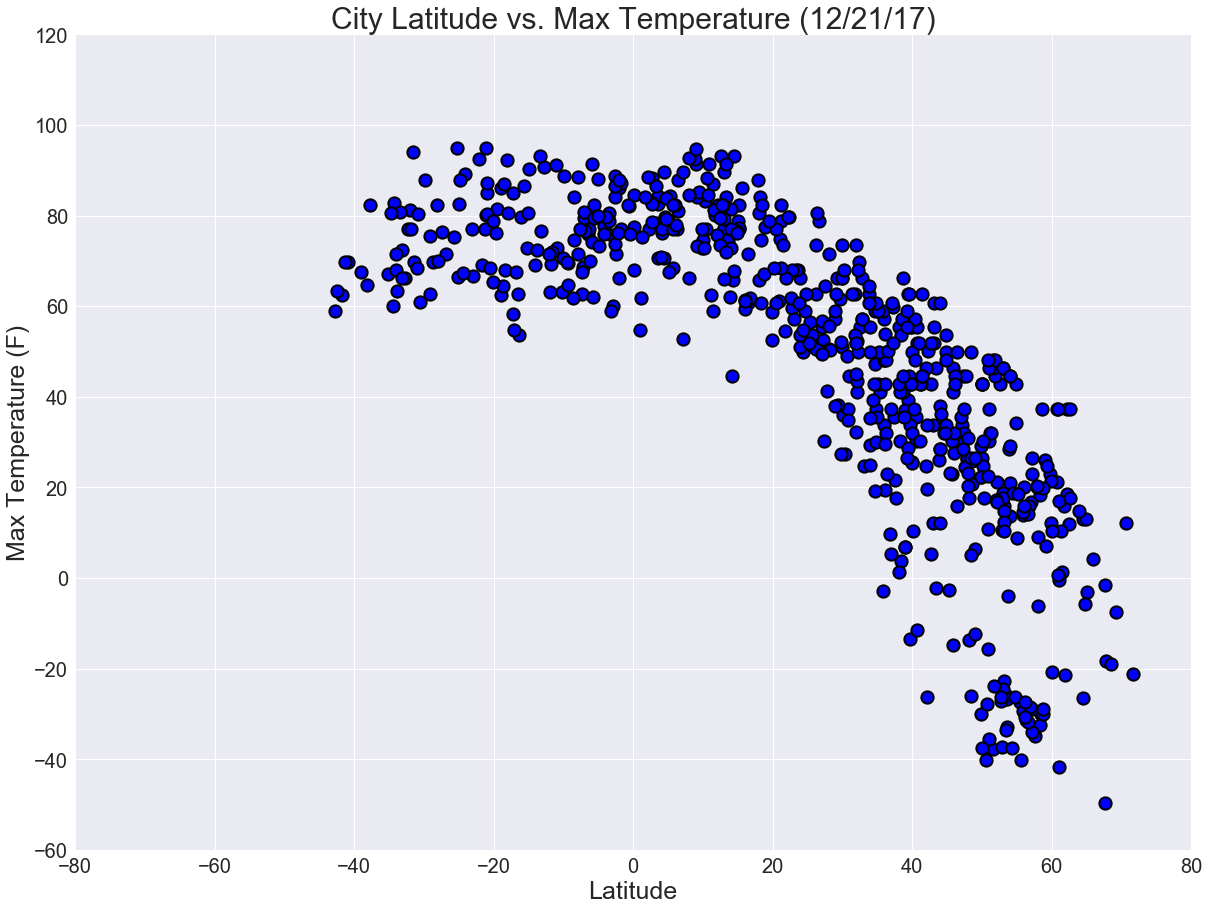

In [8]:
sampled_cities.plot(kind="scatter", x="Lat", y="Max Temp",
                    grid=True, color="blue", edgecolor = "black", s =150, linewidth = 2, 
                    figsize =(20, 15))
plt.title('City Latitude vs. Max Temperature (12/21/17)', fontsize = 30)
plt.ylabel('Max Temperature (F)',  fontsize = 25)
plt.xlabel('Latitude', fontsize = 25)
plt.grid(True)
plt.xlim(-80, 80)
plt.ylim(-60, 120)
plt.tick_params(labelsize=20)
plt.savefig('latitude_temp')
plt.show()

# Latitude vs. Humidity Plot

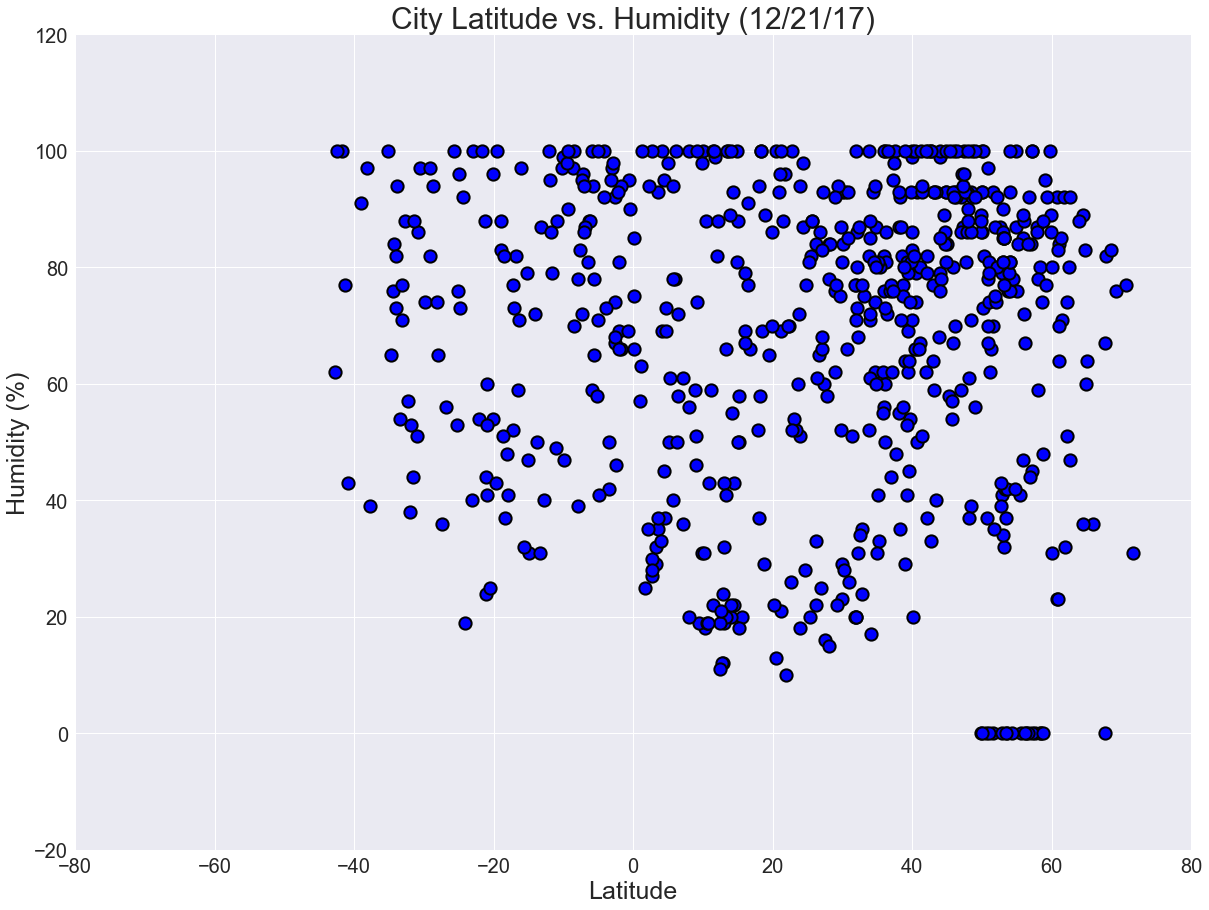

In [9]:
sampled_cities.plot(kind="scatter",x="Lat",y="Humidity",
                    grid=True, color="blue", edgecolor = "black", s =150, linewidth = 2, 
                    figsize =(20, 15))
plt.title('City Latitude vs. Humidity (12/21/17)', fontsize = 30)
plt.ylabel('Humidity (%)', fontsize = 25)
plt.xlabel('Latitude', fontsize = 25)
plt.grid(True)
plt.xlim(-80, 80)
plt.ylim(-20, 120)
plt.tick_params(labelsize=20)
plt.savefig('latitude_humidity')
plt.show()

# Latitude vs. Cloudiness Plot

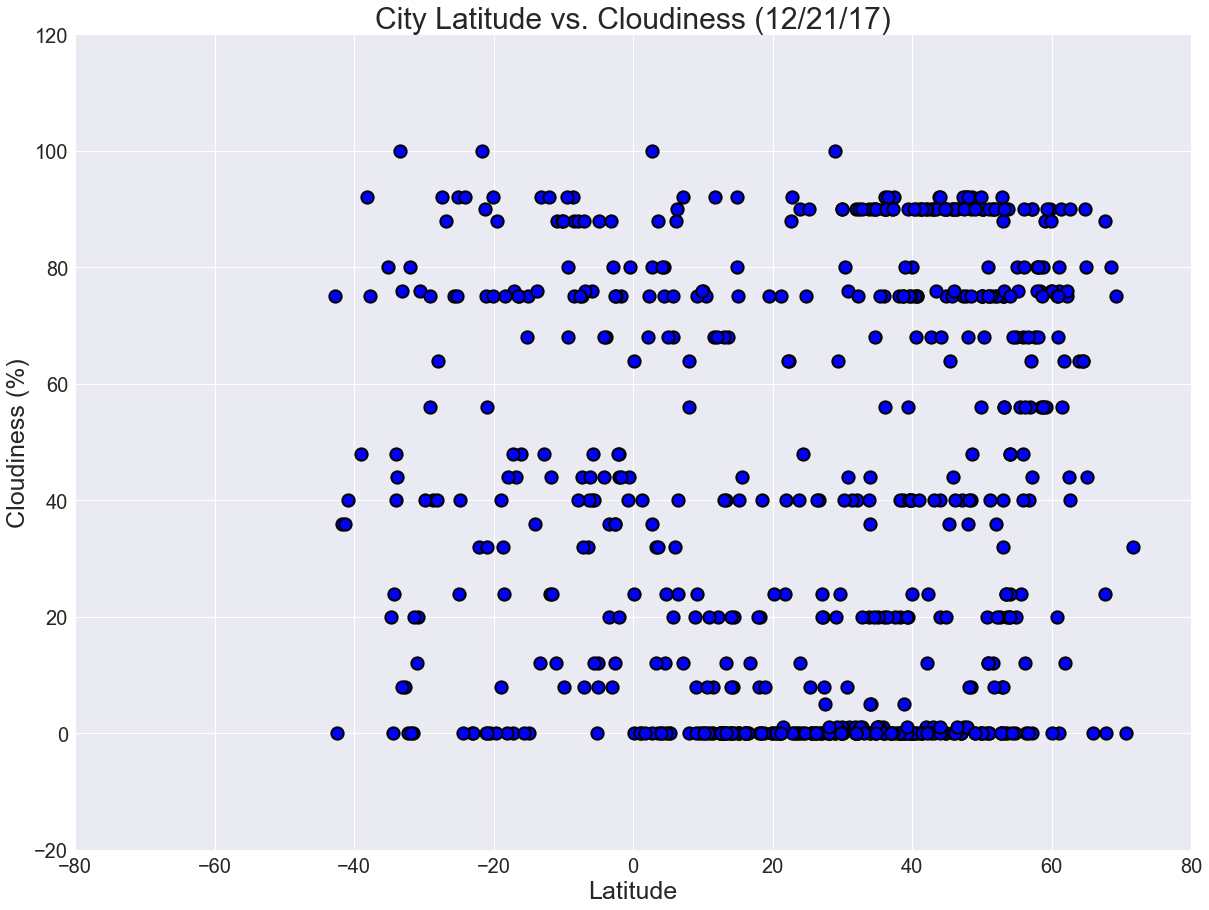

In [10]:
sampled_cities.plot(kind="scatter",x="Lat",y="Cloudiness",
                    grid=True, color="blue", edgecolor = "black", s =150, linewidth = 2, 
                    figsize =(20, 15))
plt.title('City Latitude vs. Cloudiness (12/21/17)', fontsize = 30)
plt.ylabel('Cloudiness (%)', fontsize = 25)
plt.xlabel('Latitude', fontsize = 25)
plt.grid(True)
plt.xlim(-80, 80)
plt.ylim(-20, 120)
plt.tick_params(labelsize=20)
plt.savefig('latitude_cloudiness')
plt.show()

# Latitude vs. Wind Speed Plot

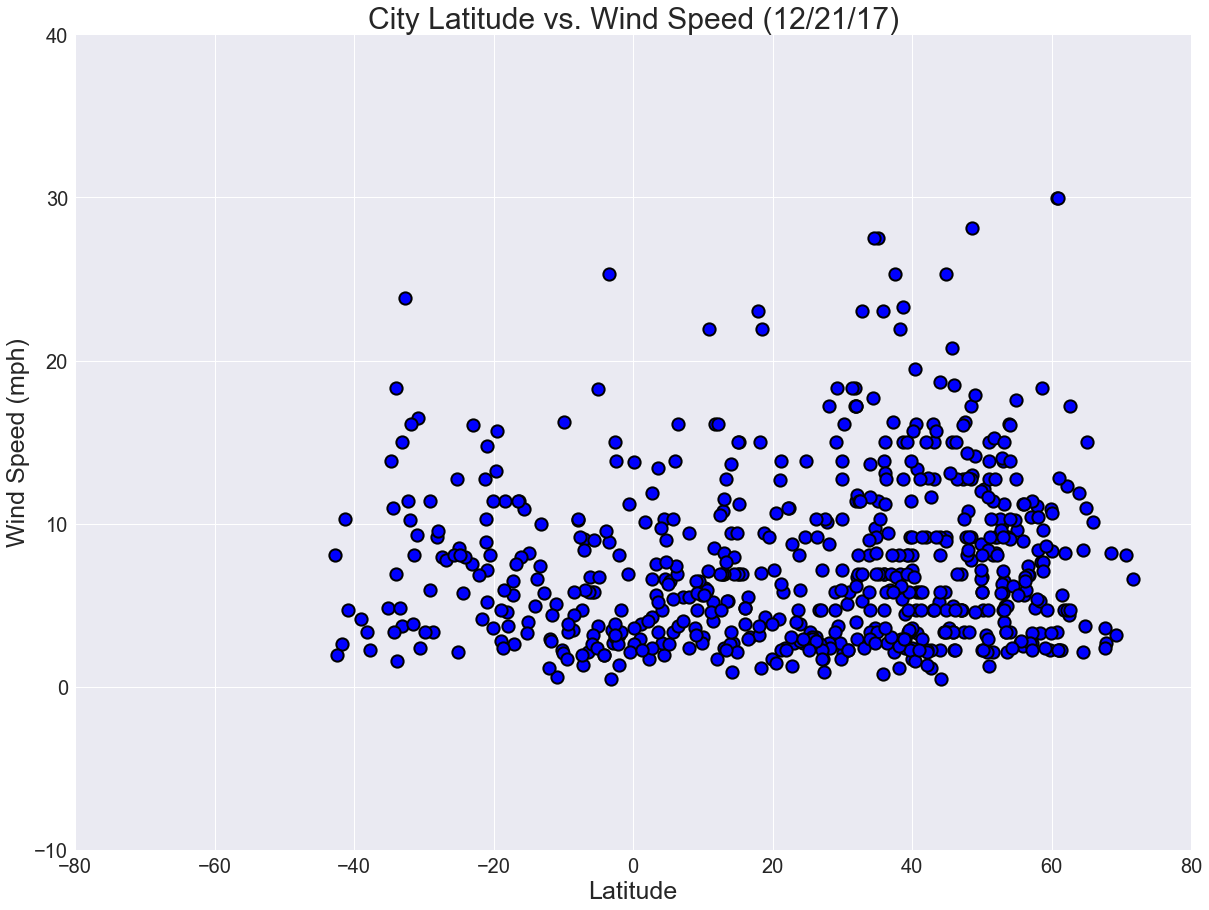

In [11]:
sampled_cities.plot(kind="scatter",x="Lat",y="Wind Speed",
                    grid=True, color="blue", edgecolor = "black", s =150, linewidth = 2, 
                    figsize =(20, 15))
plt.title('City Latitude vs. Wind Speed (12/21/17)', fontsize = 30)
plt.ylabel('Wind Speed (mph)', fontsize = 25)
plt.xlabel('Latitude', fontsize = 25)
plt.grid(True)
plt.xlim(-80, 80)
plt.ylim(-10, 40)
plt.tick_params(labelsize=20)
plt.savefig('latitude_windspeed')
plt.show()